In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv


In [15]:
df = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df['varoldbalanceOrg'] = df.amount/df['oldbalanceOrg']
df['varoldbalanceDest'] = df.amount/df['oldbalanceDest']

In [26]:
df.isnull().sum()

step                  0
type                  0
amount                0
nameOrig              0
oldbalanceOrg         0
newbalanceOrig        0
nameDest              0
oldbalanceDest        0
newbalanceDest        0
isFraud               0
isFlaggedFraud        0
varoldbalanceOrg     16
varoldbalanceDest     6
dtype: int64

In [39]:
print((df['isFraud'].value_counts()[1]/df['isFraud'].value_counts()[0])*100,"%")
print("Max", df.amount[df.isFraud == 1 ].max())


0.129248881917699 %
Max 10000000.0


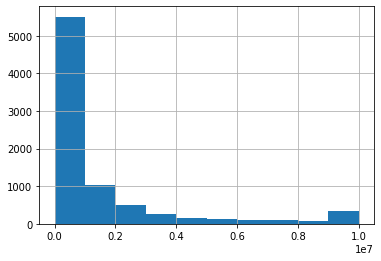

In [45]:
df.amount[df.isFraud == 1].hist()

In [ ]:
df = df.sample(frac=1)
df = df.sample(frac=1)
df = df.sample(frac=1)
X_train, X_test , y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),df['isFraud'],test_size=0.3, random_state=0)

print(len(X_train),len(X_test),len(y_train),len(y_test))



In [ ]:
train = X_train
train['isFraud'] = y_train
train.head()

In [ ]:
print(train.columns)
display(train.dtypes)


In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap="Blues")

In [ ]:
train.hist(figsize=(10,8))

In [ ]:
train.type.value_counts().plot(kind="bar")
plt.title("Type")

In [ ]:
train.type[train.isFraud == 1].value_counts().plot(kind="bar")


In [ ]:
sns.scatterplot(x=train.amount,y=train.type, hue=train.isFraud)

In [ ]:
print(train.amount[train.isFraud == 0].value_counts().mean())
print(train.amount[train.isFraud == 1].value_counts().mean())

In [ ]:
train.isFlaggedFraud[train.isFraud == 1].hist()


In [ ]:
sns.scatterplot(x = train.oldbalanceDest,y=train.newbalanceDest,hue=df.isFraud)


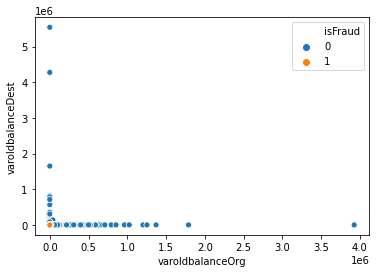

In [25]:
sns.scatterplot(x=df['varoldbalanceOrg'],y=df['varoldbalanceDest'],hue=df.isFraud)

In [21]:
df.dtypes

step                   int64
type                  object
amount               float64
nameOrig              object
oldbalanceOrg        float64
newbalanceOrig       float64
nameDest              object
oldbalanceDest       float64
newbalanceDest       float64
isFraud                int64
isFlaggedFraud         int64
varoldbalanceOrg     float64
varoldbalanceDest    float64
dtype: object